In [11]:
import os
import warnings

import matplotlib.pyplot as plt
# Import libraries
import numpy as np
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras

warnings.filterwarnings('ignore')

In [12]:
import random
random_number_generator = [x for x in range(5)]
random_number = random.choice(random_number_generator)
random_number

0

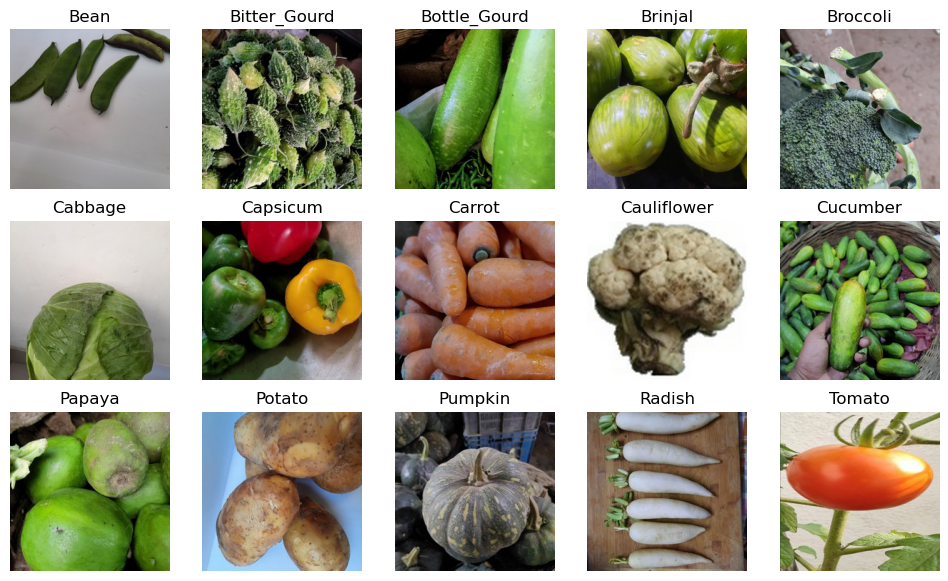

In [13]:
# Let's plot a few images
train_path = "data/vegetable-image-dataset/train"
validation_path = "data/vegetable-image-dataset/validation"
test_path = "data/vegetable-image-dataset/test"

random_number_generator = [x for x in range(5)]


image_categories = os.listdir('data/vegetable-image-dataset/train') # get semua folder yang ada di folder train -> 'Bean', 'Bitter_Gourd', 'Bottle_Gourd', etc
def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        # Load images for the ith category
        image_path = train_path + '/' + cat # get folder name sebagai path -> data/vegetable-image-dataset/train/Bean & ata/vegetable-image-dataset/train/Bitter_Gourd
        images_in_folder = os.listdir(image_path) # get all data images -> ['01.jpg', '02.jpg']
#         first_image_of_folder = images_in_folder[0] # get only first image name from all folders -> '01.jpg'

        random_number = random.choice(random_number_generator)
        first_image_of_folder = images_in_folder[random_number] # get 1 random image name from all folders -> '01.jpg'
        first_image_path = image_path + '/' + first_image_of_folder # get first image path -> data/vegetable-image-dataset/train/Tomato/01.jpg
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0 # normalisasi gambar ke numpy array lalu dibagi 255 (RGB) -> 0 / 1

        
        # Create Subplot and plot the images
        plt.subplot(5, 5, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

plot_images(image_categories)

In [14]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150), # resize ke 150x150
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [15]:
# vegetable_dict = {value: key for key, value in train_image_generator.class_indices.items()}
# print(vegetable_dict)

In [16]:
# Print the class encodings done by the generators
class_map = dict([(x, y) for x, y in train_image_generator.class_indices.items()])
print(class_map)

{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}


In [17]:
# Build a custom sequential CNN model

model = Sequential() # model object -> create a new empty model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3])) #First Convolutional Layer
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')) # second layer
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu')) # Rectified Linear Unit (ReLU)
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      11,214,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,252,815 (42.93 MB)

 Trainable params: 11,252,815 (42.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # callback, jadi kalau dia overfit -> langsung stop
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) # compiles neural network model

# setup untuk plotting nanti
hist = model.fit(train_image_generator, 
                 epochs=3, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/3
170/468 ━━━━━━━━━━━━━━━━━━━━ 2:04 419ms/step - accuracy: 0.2707 - loss: 2.2106

In [ ]:
# Plot the error and accuracy -> plot
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [10]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

94/94 [==============================] - 4s 43ms/step - loss: 0.3092 - accuracy: 0.9080


[0.3091614842414856, 0.9079999923706055]

1/1 [==============================] - 0s 112ms/step


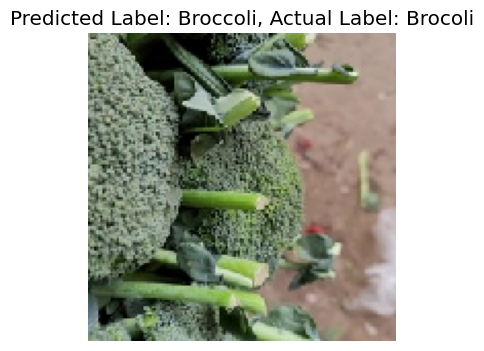

In [12]:
# Testing the Model
test_image_path = 'data/vegetable-image-dataset/test/Broccoli/1011.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function -> model belum disave atau dibuat jadi file model .sth
generate_predictions(test_image_path, actual_label='Brocoli')